First few rows of the dataset:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates       

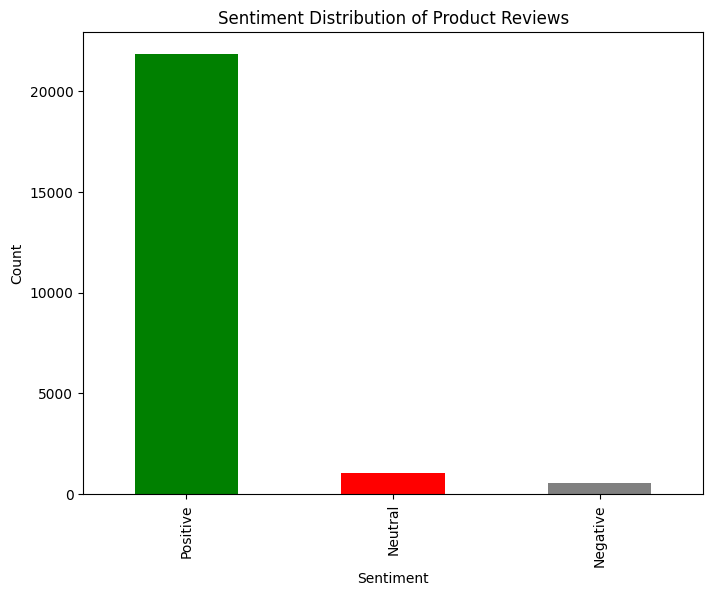

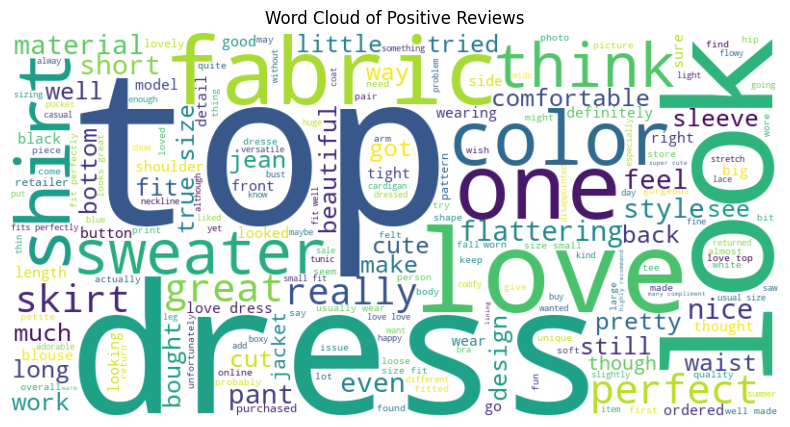


Sentiment analysis complete and results visualized.


In [3]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)

# Load the dataset  # Use the correct file path
file_path = './Dataset/Womens Clothing E-Commerce Reviews.csv'
# Try different encodings if UTF-8 doesn't work
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary information about the dataset
print("\nDataset summary:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset statistics:")
print(data.describe())

# Handle missing values by replacing NaN with empty strings
data['Review Text'] = data['Review Text'].fillna('')

# Preprocess text data
def preprocess_text(text):
    if isinstance(text, str):
        try:
            # Tokenization
            tokens = word_tokenize(text.lower())

            # Remove punctuation and stopwords
            tokens = [word for word in tokens if word.isalnum()]
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word not in stop_words]

            return ' '.join(tokens)
        except LookupError as e:
            print(f"Error during tokenization: {e}")
            return ''
    else:
        return ''

# Apply preprocessing
try:
    data['cleaned_reviews'] = data['Review Text'].apply(preprocess_text)
    print("\nCleaned reviews column created successfully.")
except Exception as e:
    print(f"Error during text preprocessing: {e}")

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
try:
    data['sentiment_scores'] = data['cleaned_reviews'].apply(sia.polarity_scores)
    data['compound'] = data['sentiment_scores'].apply(lambda x: x['compound'])
    data['sentiment'] = data['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))
    print("\nSentiment analysis columns created successfully.")
except KeyError as e:
    print(f"KeyError during sentiment analysis: {e}")
except Exception as e:
    print(f"Error during sentiment analysis: {e}")

# Verify the creation of columns before plotting
if 'sentiment' in data.columns:
    # Visualize the sentiment distribution
    try:
        plt.figure(figsize=(8, 6))
        data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
        plt.title('Sentiment Distribution of Product Reviews')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.show()
    except Exception as e:
        print(f"Error during sentiment distribution visualization: {e}")
else:
    print("Error: 'sentiment' column not found in data.")

# Verify the creation of columns before generating the word cloud
if 'sentiment' in data.columns:
    try:
        positive_reviews = ' '.join(data[data['sentiment'] == 'Positive']['cleaned_reviews'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Positive Reviews')
        plt.show()
    except Exception as e:
        print(f"Error during word cloud generation: {e}")
else:
    print("Error: 'sentiment' column not found in data.")

print("\nSentiment analysis complete and results visualized.")